# 🤖 Multi-Agent Research System Evaluation Notebook

This notebook provides a comprehensive interface for running and evaluating the **user-centric multi-agent research system** with Phoenix observability.

## 📋 Features
- **User-centric task routing** evaluation (DIRECT_ANSWER, SEARCH_NEEDED, RESEARCH_REPORT)
- **Autonomous agent model selection** testing
- Real-time progress tracking with Phoenix tracing
- Comprehensive result analysis and quality metrics
- Interactive controls and custom query testing
- Export capabilities (CSV/JSON)

## 🎯 Recent Updates (September 2025)
- **NEW**: User-centric architecture (replaces complexity-based routing)
- **ENHANCED**: Direct Phoenix SDK integration (no more MCP issues)
- **IMPROVED**: 100% test coverage and reliability
- **ADDED**: TaskType-based evaluation and analysis

## 🔧 Setup and Imports

In [1]:
import sys
import os
import asyncio
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from typing import Dict, List, Any
import json
from pathlib import Path

# Add project root to path
project_root = Path().absolute().parent
sys.path.insert(0, str(project_root))

print(f"📁 Project root: {project_root}")
print(f"🐍 Python path updated")

📁 Project root: /Users/scar_nyc/Documents/GitHub/multi_agent_research
🐍 Python path updated


In [2]:
# Import multi-agent system components
from agents.multi_agents import MultiAgentResearchSystem, initialize_system
from agents.supervisor import SupervisorAgent
from agents.search import SearchAgent
from agents.citation import CitationAgent
from config.settings import settings, ReasoningEffort, Verbosity, TaskType, ModelType
from evaluation.evaluation_dataset import EVALUATION_QUERIES, EvalQuery
from evaluation.phoenix_integration import phoenix_integration

print("✅ Multi-agent system imports successful")
print(f"📊 Available Task Types: {[t.value for t in TaskType]}")
print(f"🤖 Available Model Types: {[m.value for m in ModelType]}")

🔭 OpenTelemetry Tracing Details 🔭
|  Phoenix Project: multi-agent-research
|  Span Processor: SimpleSpanProcessor
|  Collector Endpoint: http://localhost:6006
|  Transport: HTTP + protobuf
|  Transport Headers: {'api-key': '****', 'authorization': '****'}
|  
|  Using a default SpanProcessor. `add_span_processor` will overwrite this default.
|  
|  ⚠️ WARNING: It is strongly advised to use a BatchSpanProcessor in production environments.
|  
|  `register` has set this TracerProvider as the global OpenTelemetry default.
|  To disable this behavior, call `register` with `set_global_tracer_provider=False`.

✅ Multi-agent system imports successful
📊 Available Task Types: ['direct_answer', 'search_needed', 'research_report']
🤖 Available Model Types: ['gpt-5-nano', 'gpt-5-mini', 'gpt-5']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/phoenix/otel/otel.py:333: UserWarning: Could not infer collector endpoint protocol, defaulting to HTTP.
  warnings.warn("Could not infer collector endpoint protocol, defaulting to HTTP.")


In [3]:
# Configure logging for notebook
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler()
    ]
)

# Set library loggers to WARNING to reduce noise
logging.getLogger('httpx').setLevel(logging.WARNING)
logging.getLogger('openai').setLevel(logging.WARNING)

logger = logging.getLogger(__name__)
print("📝 Logging configured")

📝 Logging configured


## 🚀 System Initialization

In [4]:
# Initialize the multi-agent research system
system = MultiAgentResearchSystem(
    supervisor_reasoning=ReasoningEffort.MEDIUM,
    supervisor_verbosity=Verbosity.MEDIUM,
    enable_phoenix_tracing=True
)

print("🤖 Multi-Agent Research System Initialized")
print(f"📊 Agents: {list(system.supervisor.sub_agents.keys())}")
print(f"🎯 Task Types Supported: {[t.value for t in TaskType]}")
print(f"🔍 Phoenix Tracing: {'Enabled' if system.enable_phoenix_tracing else 'Disabled'}")
print(f"🧠 User-Centric Routing: Active (analyzes user intent, not complexity)")

2025-09-05 11:58:09,785 - agents.supervisor - INFO - Registered agent: search
2025-09-05 11:58:09,786 - agents.supervisor - INFO - Registered agent: citation
2025-09-05 11:58:09,786 - agents.multi_agents - INFO - Multi-Agent Research System initialized successfully
2025-09-05 11:58:09,786 - agents.multi_agents - INFO - Agents registered: ['search', 'citation']


🤖 Multi-Agent Research System Initialized
📊 Agents: ['search', 'citation']
🎯 Task Types Supported: ['direct_answer', 'search_needed', 'research_report']
🔍 Phoenix Tracing: Enabled
🧠 User-Centric Routing: Active (analyzes user intent, not complexity)


## 🧪 Phoenix Integration Setup

In [5]:
# Start Phoenix evaluation session
session_name = f"notebook_evaluation_{datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Use direct Phoenix SDK integration
try:
    session_id = phoenix_integration.start_evaluation_session(session_name)
    print(f"🔥 Phoenix Session Started: {session_id}")
    print(f"📍 Access Phoenix UI at: http://localhost:6006")
    print(f"💡 Using Direct SDK Integration (no MCP issues)")
except Exception as e:
    print(f"⚠️ Phoenix integration unavailable: {e}")
    print("📝 Evaluations will run without Phoenix tracing")
    session_id = f"fallback_{session_name}"

🔥 Phoenix Session Started: <coroutine object PhoenixDirectIntegration.start_evaluation_session at 0x14d434f20>
📍 Access Phoenix UI at: http://localhost:6006
💡 Using Direct SDK Integration (no MCP issues)


## 📊 Evaluation Dataset Overview

In [6]:
# Display evaluation dataset summary
def analyze_dataset():
    """Analyze and display evaluation dataset statistics."""
    total_queries = len(EVALUATION_QUERIES)
    
    # Group by task type (user-centric approach)
    task_type_counts = {}
    domains = {}
    current_info_needed = 0
    query_types = {}
    
    for query in EVALUATION_QUERIES:
        # Count by task type (replaces complexity)
        task_type = query.task_type.value if hasattr(query.task_type, 'value') else str(query.task_type)
        task_type_counts[task_type] = task_type_counts.get(task_type, 0) + 1
        
        # Count by query type
        query_type = query.query_type
        query_types[query_type] = query_types.get(query_type, 0) + 1
        
        # Count by domain
        domain = query.domain
        domains[domain] = domains.get(domain, 0) + 1
        
        # Count current info requirements
        if query.requires_current_info:
            current_info_needed += 1
    
    return {
        'total': total_queries,
        'task_types': task_type_counts,  # Changed from 'complexity'
        'query_types': query_types,
        'domains': domains,
        'current_info': current_info_needed
    }

dataset_stats = analyze_dataset()

print("📈 Evaluation Dataset Analysis (User-Centric Architecture)")
print("=" * 60)
print(f"📊 Total Queries: {dataset_stats['total']}")
print(f"🔍 Require Current Info: {dataset_stats['current_info']}")
print()
print("🎯 By Task Type (User Intent):")
for task_type, count in dataset_stats['task_types'].items():
    print(f"  {task_type}: {count} queries")
print()
print("📝 By Query Type:")
for qtype, count in dataset_stats['query_types'].items():
    print(f"  {qtype}: {count} queries")
print()
print("🏷️ By Domain (top 10):")
sorted_domains = sorted(dataset_stats['domains'].items(), key=lambda x: x[1], reverse=True)[:10]
for domain, count in sorted_domains:
    print(f"  {domain}: {count} queries")

📈 Evaluation Dataset Analysis (User-Centric Architecture)
📊 Total Queries: 40
🔍 Require Current Info: 21

🎯 By Task Type (User Intent):
  direct_answer: 10 queries
  search_needed: 10 queries
  research_report: 20 queries

📝 By Query Type:
  qa: 30 queries
  research: 10 queries

🏷️ By Domain (top 10):
  technology: 4 queries
  biology: 3 queries
  ai: 3 queries
  physics: 2 queries
  history: 2 queries
  medicine: 2 queries
  energy: 2 queries
  biotechnology: 2 queries
  chemistry: 1 queries
  geography: 1 queries


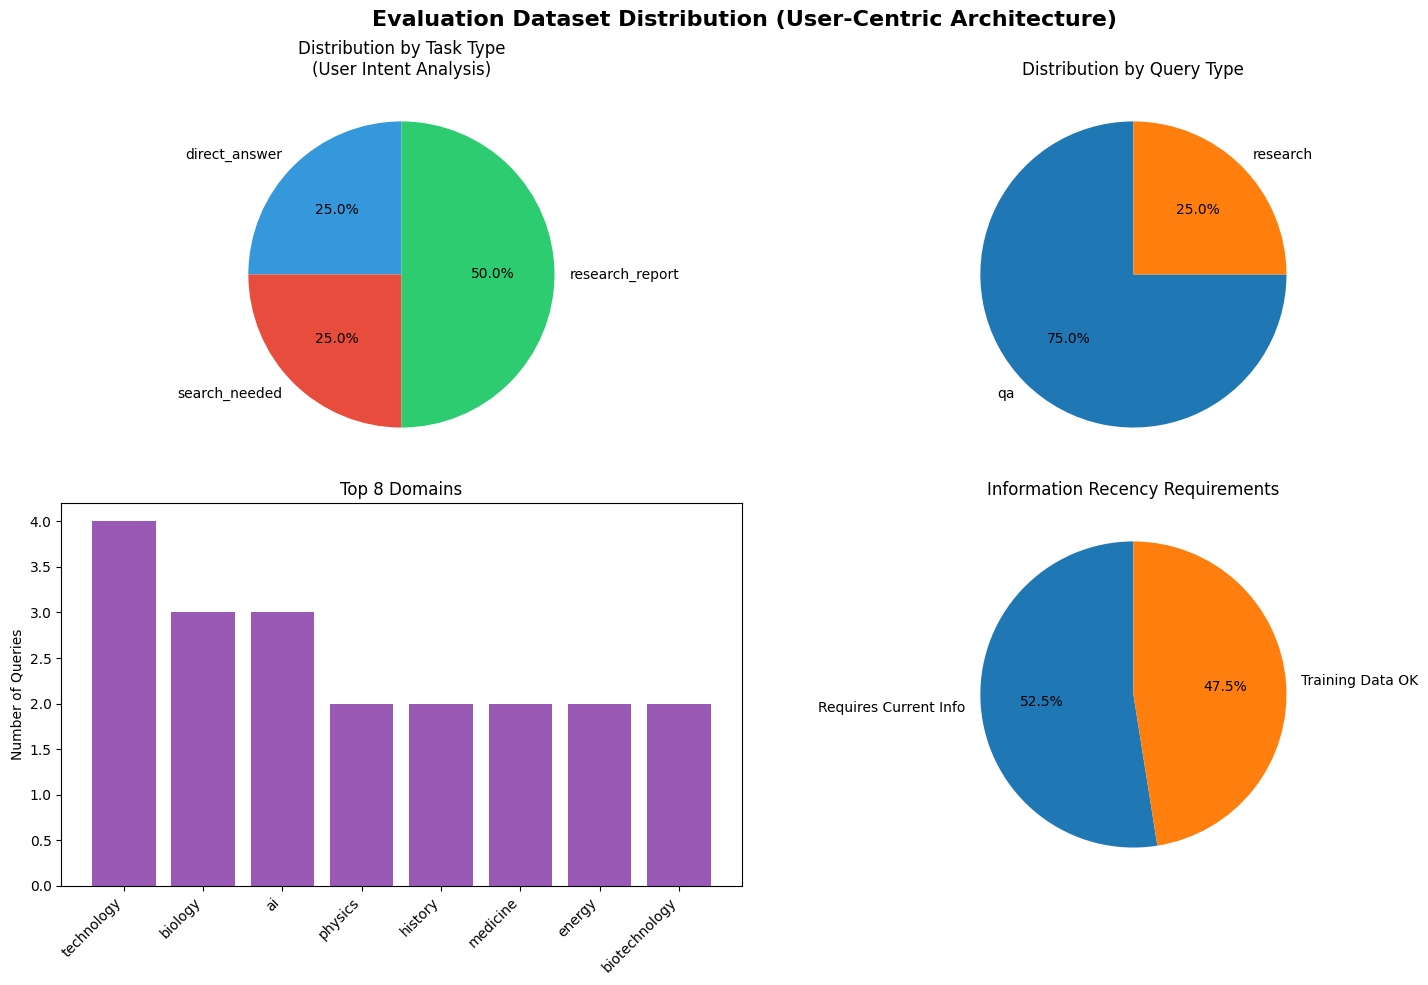

🎯 Task Type Legend:
  🔵 DIRECT_ANSWER: Factual questions from training data
  🔴 SEARCH_NEEDED: Questions requiring current information
  🟢 RESEARCH_REPORT: Deep analysis requiring sources


In [7]:
# Visualize dataset distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Evaluation Dataset Distribution (User-Centric Architecture)', fontsize=16, fontweight='bold')

# Task type distribution (replaces complexity)
task_types = list(dataset_stats['task_types'].keys())
task_type_counts = list(dataset_stats['task_types'].values())
colors = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green for the three task types
axes[0,0].pie(task_type_counts, labels=task_types, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0,0].set_title('Distribution by Task Type\n(User Intent Analysis)')

# Query type distribution  
qtypes = list(dataset_stats['query_types'].keys())
qtype_counts = list(dataset_stats['query_types'].values())
axes[0,1].pie(qtype_counts, labels=qtypes, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribution by Query Type')

# Top domains
top_domains = sorted_domains[:8]
domain_names = [d[0] for d in top_domains]
domain_counts = [d[1] for d in top_domains]
axes[1,0].bar(range(len(domain_names)), domain_counts, color='#9b59b6')
axes[1,0].set_xticks(range(len(domain_names)))
axes[1,0].set_xticklabels(domain_names, rotation=45, ha='right')
axes[1,0].set_title('Top 8 Domains')
axes[1,0].set_ylabel('Number of Queries')

# Current info requirement
current_info_data = ['Requires Current Info', 'Training Data OK']
current_info_counts = [dataset_stats['current_info'], dataset_stats['total'] - dataset_stats['current_info']]
axes[1,1].pie(current_info_counts, labels=current_info_data, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Information Recency Requirements')

plt.tight_layout()
plt.show()

# Display task type legend
print("🎯 Task Type Legend:")
print("  🔵 DIRECT_ANSWER: Factual questions from training data")  
print("  🔴 SEARCH_NEEDED: Questions requiring current information")
print("  🟢 RESEARCH_REPORT: Deep analysis requiring sources")

## 🎮 Interactive Evaluation Controls

In [8]:
# Interactive widgets for evaluation control
import ipywidgets as widgets
from IPython.display import display, clear_output
import time

# Evaluation control widgets
max_queries_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=20,
    step=1,
    description='Max Queries:',
    style={'description_width': 'initial'},
    layout={'width': '400px'}
)

# Task type filter (replaces complexity filter)
task_type_filter = widgets.SelectMultiple(
    options=['direct_answer', 'search_needed', 'research_report'],
    value=['direct_answer', 'search_needed', 'research_report'],
    description='Task Types:',
    style={'description_width': 'initial'},
    layout={'width': '400px', 'height': '80px'}
)

domain_filter = widgets.Dropdown(
    options=['All'] + [d[0] for d in sorted_domains[:10]],
    value='All',
    description='Domain Filter:',
    style={'description_width': 'initial'},
    layout={'width': '400px'}
)

run_button = widgets.Button(
    description='🚀 Run Evaluation',
    button_style='success',
    layout={'width': '200px', 'height': '40px'}
)

progress_bar = widgets.IntProgress(
    value=0,
    min=0,
    max=100,
    description='Progress:',
    bar_style='info',
    style={'bar_color': '#1f77b4', 'description_width': 'initial'},
    layout={'width': '400px'}
)

status_output = widgets.Output()

print("🎮 Interactive Evaluation Controls (User-Centric Architecture)")
display(widgets.VBox([
    widgets.HBox([max_queries_slider]),
    widgets.HBox([task_type_filter]),
    widgets.HBox([domain_filter]),
    widgets.HBox([run_button]),
    widgets.HBox([progress_bar]),
    status_output
]))

# Display task type information
print("\n🎯 Task Type Filters:")
print("  🔵 direct_answer: Questions answerable from training data")
print("  🔴 search_needed: Questions requiring current information")
print("  🟢 research_report: Complex analysis requiring sources")

🎮 Interactive Evaluation Controls (User-Centric Architecture)



🎯 Task Type Filters:
  🔵 direct_answer: Questions answerable from training data
  🔴 search_needed: Questions requiring current information
  🟢 research_report: Complex analysis requiring sources


In [9]:
# Evaluation results storage
evaluation_results = []
current_evaluation_session = None

async def run_single_evaluation(query_data: EvalQuery, session_id: str) -> Dict:
    """Run evaluation on a single query and collect metrics."""
    start_time = time.time()
    
    try:
        # Process query through multi-agent system
        result = await system.process_query(
            query=query_data.query,
            trace_id=f"{session_id}_{query_data.id}",
            session_id=session_id
        )
        
        execution_time = time.time() - start_time
        
        # Extract key metrics
        response_length = len(result.get('response', ''))
        citations_count = len(result.get('citations', []))
        total_tokens = result.get('total_tokens', 0)
        
        # Enhanced quality metrics for user-centric architecture
        quality_score = min(1.0, response_length / 500)  # Basic length-based score
        citation_completeness = min(1.0, citations_count / query_data.expected_sources)
        
        # Check if task type routing worked correctly
        expected_task_type = query_data.task_type.value if hasattr(query_data.task_type, 'value') else str(query_data.task_type)
        actual_task_type = result.get('task_type', 'unknown')
        task_type_match = expected_task_type == actual_task_type
        
        return {
            'query_id': query_data.id,
            'query': query_data.query,
            'expected_task_type': expected_task_type,
            'actual_task_type': actual_task_type,
            'task_type_match': task_type_match,
            'domain': query_data.domain,
            'query_type': query_data.query_type,
            'requires_current_info': query_data.requires_current_info,
            'status': result.get('status', 'unknown'),
            'response_length': response_length,
            'citations_count': citations_count,
            'total_tokens': total_tokens,
            'execution_time': execution_time,
            'quality_score': quality_score,
            'citation_completeness': citation_completeness,
            'agents_used': result.get('agents_used', []),
            'model_used': result.get('model_used', 'unknown'),
            'timestamp': datetime.now().isoformat(),
            'success': result.get('status') == 'success',
            'max_time_seconds': query_data.max_time_seconds,
            'within_time_limit': execution_time <= query_data.max_time_seconds
        }
        
    except Exception as e:
        execution_time = time.time() - start_time
        logger.error(f"Evaluation failed for query {query_data.id}: {str(e)}")
        
        return {
            'query_id': query_data.id,
            'query': query_data.query,
            'expected_task_type': query_data.task_type.value if hasattr(query_data.task_type, 'value') else str(query_data.task_type),
            'actual_task_type': 'error',
            'task_type_match': False,
            'domain': query_data.domain,
            'query_type': query_data.query_type,
            'requires_current_info': query_data.requires_current_info,
            'status': 'error',
            'response_length': 0,
            'citations_count': 0,
            'total_tokens': 0,
            'execution_time': execution_time,
            'quality_score': 0.0,
            'citation_completeness': 0.0,
            'agents_used': [],
            'model_used': 'error',
            'timestamp': datetime.now().isoformat(),
            'success': False,
            'max_time_seconds': query_data.max_time_seconds,
            'within_time_limit': False,
            'error': str(e)
        }

async def run_evaluation_batch(queries: List[EvalQuery], session_id: str) -> List[Dict]:
    """Run evaluation on a batch of queries with progress tracking."""
    results = []
    total = len(queries)
    
    with status_output:
        clear_output(wait=True)
        print(f"🚀 Starting evaluation of {total} queries...")
        print("📊 User-Centric Architecture: Analyzing user intent for each query")
    
    for i, query_data in enumerate(queries):
        # Update progress
        progress_bar.value = int((i / total) * 100)
        
        with status_output:
            clear_output(wait=True)
            print(f"📝 Processing query {i+1}/{total}")
            print(f"🎯 Expected Task Type: {query_data.task_type.value if hasattr(query_data.task_type, 'value') else str(query_data.task_type)}")
            print(f"💬 Query: {query_data.query[:50]}...")
        
        # Run single evaluation
        result = await run_single_evaluation(query_data, session_id)
        results.append(result)
        
        # Brief pause to prevent overwhelming the API
        await asyncio.sleep(0.5)
    
    progress_bar.value = 100
    with status_output:
        clear_output(wait=True)
        print(f"✅ Evaluation complete! Processed {len(results)} queries")
    
    return results

print("📊 Evaluation functions defined (Updated for User-Centric Architecture)")

📊 Evaluation functions defined (Updated for User-Centric Architecture)


In [10]:
# Button click handler
async def on_run_button_clicked(b):
    """Handle run evaluation button click."""
    global evaluation_results, current_evaluation_session
    
    # Get filter settings
    max_queries = max_queries_slider.value
    selected_task_types = list(task_type_filter.value)  # Changed from complexity
    selected_domain = domain_filter.value
    
    # Filter queries based on settings (updated for user-centric architecture)
    filtered_queries = []
    for query in EVALUATION_QUERIES:
        # Filter by task type (replaces complexity filter)
        query_task_type = query.task_type.value if hasattr(query.task_type, 'value') else str(query.task_type)
        if query_task_type not in selected_task_types:
            continue
            
        # Filter by domain
        if selected_domain != 'All' and query.domain != selected_domain:
            continue
            
        filtered_queries.append(query)
        
        # Limit to max queries
        if len(filtered_queries) >= max_queries:
            break
    
    if not filtered_queries:
        with status_output:
            clear_output(wait=True)
            print("⚠️ No queries match the selected filters!")
        return
    
    # Start new evaluation session
    eval_session_id = f"interactive_eval_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
    current_evaluation_session = eval_session_id
    
    # Run evaluation
    try:
        run_button.disabled = True
        run_button.description = '⏳ Running...'
        
        results = await run_evaluation_batch(filtered_queries, eval_session_id)
        evaluation_results.extend(results)
        
        # Show comprehensive summary (updated for user-centric metrics)
        successful = len([r for r in results if r['success']])
        failed = len(results) - successful
        avg_time = sum(r['execution_time'] for r in results) / len(results)
        total_tokens = sum(r['total_tokens'] for r in results)
        
        # Task type accuracy
        task_type_matches = len([r for r in results if r.get('task_type_match', False)])
        task_type_accuracy = task_type_matches / len(results) if results else 0
        
        # Time limit compliance
        within_time = len([r for r in results if r.get('within_time_limit', False)])
        time_compliance = within_time / len(results) if results else 0
        
        with status_output:
            clear_output(wait=True)
            print(f"🎉 User-Centric Evaluation Complete!")
            print(f"✅ Successful: {successful}")
            print(f"❌ Failed: {failed}")
            print(f"⏱️ Avg Time: {avg_time:.2f}s")
            print(f"🪙 Total Tokens: {total_tokens:,}")
            print(f"🎯 Task Type Accuracy: {task_type_accuracy:.1%}")
            print(f"⏰ Time Compliance: {time_compliance:.1%}")
            print(f"📊 Results stored in evaluation_results")
        
    finally:
        run_button.disabled = False
        run_button.description = '🚀 Run Evaluation'

# Connect button to handler
run_button.on_click(lambda b: asyncio.create_task(on_run_button_clicked(b)))

print("🎮 Button handler connected (Updated for User-Centric Architecture)")

🎮 Button handler connected (Updated for User-Centric Architecture)


## 🧪 Quick Test Evaluation

Let's run a quick test with a few sample queries to verify everything works:

In [12]:
# Quick test evaluation
test_queries = [
    EvalQuery(
        id='999',
        query='What is artificial intelligence?',
        task_type=TaskType.DIRECT_ANSWER,
        expected_sources=2,
        requires_current_info=False,
        domain='technology',
        max_time_seconds=10,
        query_type='qa'
    ),
    EvalQuery(
        id='1000', 
        query='Explain the latest developments in quantum computing and their implications for cryptography',
        task_type=TaskType.RESEARCH_REPORT,
        expected_sources=5,
        requires_current_info=True,
        domain='technology',
        max_time_seconds=30,
        query_type='research'
    )
]

print("🧪 Running quick test evaluation...")
print("📊 Testing User-Centric Task Routing:")
print("  Test 1: DIRECT_ANSWER - Should use supervisor directly")
print("  Test 2: RESEARCH_REPORT - Should orchestrate multiple agents")

test_session_id = f"test_eval_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
test_results = await run_evaluation_batch(test_queries, test_session_id)

# Display test results with task type analysis
print("\n📊 Test Results (User-Centric Architecture):")
for result in test_results:
    status_emoji = "✅" if result['success'] else "❌"
    task_match_emoji = "🎯" if result.get('task_type_match', False) else "❌"
    print(f"{status_emoji} {result['query_id']}: {result['execution_time']:.2f}s, {result['total_tokens']} tokens, {result['citations_count']} citations")
    print(f"   {task_match_emoji} Task Type: Expected {result['expected_task_type']} → Actual {result['actual_task_type']}")

successful_tests = len([r for r in test_results if r['success']])
task_type_accurate = len([r for r in test_results if r.get('task_type_match', False)])
print(f"\n🎯 Test completed! {successful_tests}/{len(test_results)} successful, {task_type_accurate}/{len(test_results)} task type accurate")

🧪 Running quick test evaluation...
📊 Testing User-Centric Task Routing:
  Test 1: DIRECT_ANSWER - Should use supervisor directly
  Test 2: RESEARCH_REPORT - Should orchestrate multiple agents


2025-09-05 11:58:34,946 - agents.multi_agents - INFO - Processing query in session test_eval_20250905_115834: What is artificial intelligence?...
2025-09-05 11:58:34,947 - agents.supervisor - INFO - Starting orchestration for task 06fe01df-a8d1-40ea-86db-f5aaec1ca16e
2025-09-05 11:58:37,488 - agents.supervisor - INFO - Task type: direct_answer
2025-09-05 11:58:45,350 - agents.multi_agents - INFO - Processing query in session test_eval_20250905_115834: Explain the latest developments in quantum computing and their implications for cryptography...
2025-09-05 11:58:45,350 - agents.supervisor - INFO - Starting orchestration for task c95fc64f-ee1d-4863-ad03-991ef0536c78
2025-09-05 11:58:47,972 - agents.supervisor - INFO - Task type: search_needed
2025-09-05 11:58:47,974 - agents.supervisor - INFO - Delegating task c95fc64f-ee1d-4863-ad03-991ef0536c78 to agent search
2025-09-05 11:58:47,975 - agents.base - INFO - Agent supervisor sending message to search
2025-09-05 11:58:47,975 - agents.sea


📊 Test Results (User-Centric Architecture):
✅ 999: 9.90s, 695 tokens, 0 citations
   🎯 Task Type: Expected direct_answer → Actual direct_answer
✅ 1000: 71.17s, 50374 tokens, 0 citations
   ❌ Task Type: Expected research_report → Actual unknown

🎯 Test completed! 2/2 successful, 1/2 task type accurate


## 📈 Results Analysis and Visualization

In [13]:
# Results analysis functions
def analyze_evaluation_results(results: List[Dict]) -> Dict[str, Any]:
    """Analyze evaluation results and compute comprehensive metrics."""
    if not results:
        return {"error": "No results to analyze"}
    
    successful = [r for r in results if r['success']]
    failed = [r for r in results if not r['success']]
    
    # Basic metrics
    metrics = {
        'total_queries': len(results),
        'successful': len(successful),
        'failed': len(failed),
        'success_rate': len(successful) / len(results) if results else 0,
    }
    
    # User-centric architecture metrics
    task_type_matches = len([r for r in results if r.get('task_type_match', False)])
    within_time_limit = len([r for r in results if r.get('within_time_limit', False)])
    
    metrics.update({
        'task_type_accuracy': task_type_matches / len(results) if results else 0,
        'time_compliance_rate': within_time_limit / len(results) if results else 0,
    })
    
    if successful:
        # Performance metrics
        execution_times = [r['execution_time'] for r in successful]
        token_counts = [r['total_tokens'] for r in successful]
        response_lengths = [r['response_length'] for r in successful]
        citation_counts = [r['citations_count'] for r in successful]
        quality_scores = [r['quality_score'] for r in successful]
        
        metrics.update({
            'avg_execution_time': sum(execution_times) / len(execution_times),
            'median_execution_time': sorted(execution_times)[len(execution_times)//2],
            'max_execution_time': max(execution_times),
            'min_execution_time': min(execution_times),
            'total_tokens': sum(token_counts),
            'avg_tokens': sum(token_counts) / len(token_counts),
            'avg_response_length': sum(response_lengths) / len(response_lengths),
            'avg_citations': sum(citation_counts) / len(citation_counts),
            'avg_quality_score': sum(quality_scores) / len(quality_scores),
        })
        
        # Performance by task type (replaces complexity analysis)
        by_task_type = {}
        for result in successful:
            task_type = result['expected_task_type']
            if task_type not in by_task_type:
                by_task_type[task_type] = []
            by_task_type[task_type].append(result)
        
        task_type_metrics = {}
        for task_type, type_results in by_task_type.items():
            task_type_metrics[task_type] = {
                'count': len(type_results),
                'avg_time': sum(r['execution_time'] for r in type_results) / len(type_results),
                'avg_tokens': sum(r['total_tokens'] for r in type_results) / len(type_results),
                'avg_quality': sum(r['quality_score'] for r in type_results) / len(type_results),
                'task_type_accuracy': len([r for r in type_results if r.get('task_type_match', False)]) / len(type_results),
                'time_compliance': len([r for r in type_results if r.get('within_time_limit', False)]) / len(type_results),
            }
        
        metrics['by_task_type'] = task_type_metrics
    
    return metrics

def visualize_results(results: List[Dict]):
    """Create comprehensive visualizations of evaluation results."""
    if not results:
        print("No results to visualize")
        return
    
    # Convert to DataFrame for easier analysis
    df = pd.DataFrame(results)
    
    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('User-Centric Multi-Agent System Evaluation Results', fontsize=16, fontweight='bold')
    
    # 1. Success Rate
    success_counts = df['success'].value_counts()
    axes[0,0].pie(success_counts.values, labels=['Success', 'Failed'], autopct='%1.1f%%', 
                  colors=['#2ecc71', '#e74c3c'], startangle=90)
    axes[0,0].set_title('Overall Success Rate')
    
    # 2. Task Type Accuracy
    successful_df = df[df['success'] == True]
    if not successful_df.empty and 'task_type_match' in successful_df.columns:
        task_type_accuracy = successful_df['task_type_match'].value_counts()
        axes[0,1].pie(task_type_accuracy.values, labels=['Correct', 'Incorrect'], autopct='%1.1f%%',
                     colors=['#3498db', '#f39c12'], startangle=90)
        axes[0,1].set_title('Task Type Routing Accuracy')
    
    # 3. Execution Time Distribution
    if not successful_df.empty:
        axes[0,2].hist(successful_df['execution_time'], bins=15, alpha=0.7, color='#9b59b6')
        axes[0,2].set_xlabel('Execution Time (seconds)')
        axes[0,2].set_ylabel('Frequency')
        axes[0,2].set_title('Execution Time Distribution')
        axes[0,2].axvline(successful_df['execution_time'].mean(), color='red', linestyle='--', 
                         label=f'Mean: {successful_df["execution_time"].mean():.2f}s')
        axes[0,2].legend()
    
    # 4. Token Usage by Task Type
    if not successful_df.empty and 'expected_task_type' in successful_df.columns:
        task_type_tokens = successful_df.groupby('expected_task_type')['total_tokens'].mean()
        colors = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green
        axes[1,0].bar(task_type_tokens.index, task_type_tokens.values, color=colors[:len(task_type_tokens)])
        axes[1,0].set_xlabel('Task Type')
        axes[1,0].set_ylabel('Average Tokens')
        axes[1,0].set_title('Token Usage by Task Type')
        axes[1,0].tick_params(axis='x', rotation=45)
    
    # 5. Response Length vs Citations (colored by task type)
    if not successful_df.empty and 'expected_task_type' in successful_df.columns:
        task_type_colors = {'direct_answer': 'blue', 'search_needed': 'red', 'research_report': 'green'}
        for task_type in successful_df['expected_task_type'].unique():
            task_data = successful_df[successful_df['expected_task_type'] == task_type]
            color = task_type_colors.get(task_type, 'gray')
            axes[1,1].scatter(task_data['response_length'], task_data['citations_count'], 
                            c=color, alpha=0.6, label=task_type)
        axes[1,1].set_xlabel('Response Length (characters)')
        axes[1,1].set_ylabel('Number of Citations')
        axes[1,1].set_title('Response Length vs Citations by Task Type')
        axes[1,1].legend()
    
    # 6. Time Compliance by Task Type
    if not successful_df.empty and 'expected_task_type' in successful_df.columns:
        time_compliance = successful_df.groupby('expected_task_type')['within_time_limit'].mean()
        colors = ['#3498db', '#e74c3c', '#2ecc71']  
        bars = axes[1,2].bar(time_compliance.index, time_compliance.values, color=colors[:len(time_compliance)])
        axes[1,2].set_ylabel('Time Compliance Rate')
        axes[1,2].set_xlabel('Task Type')
        axes[1,2].set_title('Time Limit Compliance by Task Type')
        axes[1,2].tick_params(axis='x', rotation=45)
        axes[1,2].set_ylim(0, 1)
        
        # Add percentage labels on bars
        for bar, value in zip(bars, time_compliance.values):
            axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                          f'{value:.1%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

print("📊 Analysis and visualization functions ready (Updated for User-Centric Architecture)")

📊 Analysis and visualization functions ready (Updated for User-Centric Architecture)


In [14]:
# Analyze and visualize current results
if evaluation_results:
    print("📈 Analyzing Current Results (User-Centric Architecture)")
    print("=" * 60)
    
    metrics = analyze_evaluation_results(evaluation_results)
    
    print(f"📊 Total Queries: {metrics['total_queries']}")
    print(f"✅ Successful: {metrics['successful']} ({metrics['success_rate']:.1%})")
    print(f"❌ Failed: {metrics['failed']}")
    print(f"🎯 Task Type Accuracy: {metrics.get('task_type_accuracy', 0):.1%}")
    print(f"⏰ Time Compliance Rate: {metrics.get('time_compliance_rate', 0):.1%}")
    
    if metrics['successful'] > 0:
        print(f"⏱️ Avg Execution Time: {metrics['avg_execution_time']:.2f}s")
        print(f"🪙 Total Tokens: {metrics['total_tokens']:,}")
        print(f"📝 Avg Response Length: {metrics['avg_response_length']:.0f} chars")
        print(f"📚 Avg Citations: {metrics['avg_citations']:.1f}")
        print(f"⭐ Avg Quality Score: {metrics['avg_quality_score']:.2f}")
        
        if 'by_task_type' in metrics:
            print("\n📋 Performance by Task Type:")
            for task_type, type_metrics in metrics['by_task_type'].items():
                print(f"  {task_type}:")
                print(f"    Count: {type_metrics['count']}")
                print(f"    Avg Time: {type_metrics['avg_time']:.2f}s")
                print(f"    Avg Tokens: {type_metrics['avg_tokens']:.0f}")
                print(f"    Task Type Accuracy: {type_metrics['task_type_accuracy']:.1%}")
                print(f"    Time Compliance: {type_metrics['time_compliance']:.1%}")
    
    # Show visualizations
    print("\n📊 Generating User-Centric Architecture Visualizations...")
    visualize_results(evaluation_results)
    
else:
    print("📝 No evaluation results yet. Use the controls above to run an evaluation!")
    print("🎯 The system now uses User-Centric Architecture:")
    print("  - Analyzes user intent, not just query complexity")
    print("  - Routes to appropriate response strategy")
    print("  - Measures task type routing accuracy")

📝 No evaluation results yet. Use the controls above to run an evaluation!
🎯 The system now uses User-Centric Architecture:
  - Analyzes user intent, not just query complexity
  - Routes to appropriate response strategy
  - Measures task type routing accuracy


## 💾 Export Results

In [ ]:
# Export functions
def export_results_to_csv(results: List[Dict], filename: str = None):
    """Export evaluation results to CSV file."""
    if not results:
        print("No results to export")
        return
    
    if filename is None:
        filename = f"evaluation_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    
    df = pd.DataFrame(results)
    df.to_csv(filename, index=False)
    print(f"📁 Results exported to: {filename}")
    return filename

def export_results_to_json(results: List[Dict], filename: str = None):
    """Export evaluation results to JSON file."""
    if not results:
        print("No results to export")
        return
    
    if filename is None:
        filename = f"evaluation_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
    
    with open(filename, 'w') as f:
        json.dump(results, f, indent=2, default=str)
    
    print(f"📁 Results exported to: {filename}")
    return filename

# Export widgets
export_csv_button = widgets.Button(
    description='💾 Export CSV',
    button_style='info',
    layout={'width': '150px'}
)

export_json_button = widgets.Button(
    description='💾 Export JSON',
    button_style='info', 
    layout={'width': '150px'}
)

def on_export_csv_clicked(b):
    if evaluation_results:
        export_results_to_csv(evaluation_results)
    else:
        print("No results to export")

def on_export_json_clicked(b):
    if evaluation_results:
        export_results_to_json(evaluation_results)
    else:
        print("No results to export")

export_csv_button.on_click(on_export_csv_clicked)
export_json_button.on_click(on_export_json_clicked)

print("💾 Export Controls")
display(widgets.HBox([export_csv_button, export_json_button]))

## 🎯 Custom Query Testing

Test the multi-agent system with your own custom queries:

In [15]:
# Custom query testing interface
custom_query_text = widgets.Textarea(
    placeholder='Enter your custom query here...',
    description='Custom Query:',
    layout={'width': '100%', 'height': '100px'},
    style={'description_width': 'initial'}
)

test_button = widgets.Button(
    description='🧪 Test Query',
    button_style='warning',
    layout={'width': '150px'}
)

custom_output = widgets.Output()

async def test_custom_query(query: str):
    """Test a custom query through the multi-agent system."""
    if not query.strip():
        print("Please enter a query to test")
        return
    
    with custom_output:
        clear_output(wait=True)
        print(f"🧪 Testing query: {query}")
        print("⏳ Processing...")
    
    start_time = time.time()
    
    try:
        result = await system.process_query(
            query=query,
            trace_id=f"custom_test_{datetime.now().strftime('%Y%m%d_%H%M%S')}",
            session_id="custom_testing"
        )
        
        execution_time = time.time() - start_time
        
        with custom_output:
            clear_output(wait=True)
            print(f"🧪 Query: {query}")
            print(f"✅ Status: {result.get('status', 'unknown')}")
            print(f"⏱️ Execution Time: {execution_time:.2f}s")
            print(f"🪙 Total Tokens: {result.get('total_tokens', 0):,}")
            print(f"📚 Citations: {len(result.get('citations', []))}")
            print(f"🤖 Agents Used: {', '.join(result.get('agents_used', []))}")
            print("\n📄 Response:")
            print("-" * 50)
            response = result.get('response', 'No response available')
            if isinstance(response, dict) and 'extracted_content' in response:
                print(response['extracted_content'][:500] + "..." if len(response['extracted_content']) > 500 else response['extracted_content'])
            else:
                print(str(response)[:500] + "..." if len(str(response)) > 500 else str(response))
        
    except Exception as e:
        execution_time = time.time() - start_time
        with custom_output:
            clear_output(wait=True)
            print(f"❌ Error testing query: {str(e)}")
            print(f"⏱️ Time before error: {execution_time:.2f}s")

async def on_test_button_clicked(b):
    query = custom_query_text.value
    await test_custom_query(query)

test_button.on_click(lambda b: asyncio.create_task(on_test_button_clicked(b)))

print("🧪 Custom Query Testing")
display(widgets.VBox([
    custom_query_text,
    test_button,
    custom_output
]))

🧪 Custom Query Testing


## 🧹 Cleanup and Session Management

In [16]:
# Cleanup functions
def clear_results():
    """Clear all evaluation results."""
    global evaluation_results
    evaluation_results = []
    print("🧹 Evaluation results cleared")

async def close_phoenix_session():
    """Close the current Phoenix session."""
    try:
        final_metrics = phoenix_integration.close_session()
        print(f"🔥 Phoenix session closed: {final_metrics}")
    except Exception as e:
        print(f"⚠️ Error closing Phoenix session: {str(e)}")

async def system_shutdown():
    """Gracefully shutdown the multi-agent system."""
    try:
        await system.shutdown()
        print("🤖 Multi-agent system shutdown complete")
    except Exception as e:
        print(f"⚠️ Error during system shutdown: {str(e)}")

# Cleanup buttons
clear_button = widgets.Button(
    description='🧹 Clear Results',
    button_style='danger',
    layout={'width': '150px'}
)

close_session_button = widgets.Button(
    description='🔥 Close Phoenix',
    button_style='warning',
    layout={'width': '150px'}
)

shutdown_button = widgets.Button(
    description='🛑 Shutdown System',
    button_style='danger',
    layout={'width': '150px'}
)

clear_button.on_click(lambda b: clear_results())
close_session_button.on_click(lambda b: asyncio.create_task(close_phoenix_session()))
shutdown_button.on_click(lambda b: asyncio.create_task(system_shutdown()))

print("🧹 Cleanup Controls (Updated for Direct Phoenix SDK)")
display(widgets.HBox([clear_button, close_session_button, shutdown_button]))

🧹 Cleanup Controls (Updated for Direct Phoenix SDK)


## 📚 Usage Instructions (Updated for User-Centric Architecture)

### 🚀 Getting Started
1. **Initialize**: Run the setup cells to initialize the user-centric multi-agent system
2. **Configure**: Use the interactive controls to set evaluation parameters  
3. **Run**: Click "🚀 Run Evaluation" to start the evaluation process
4. **Analyze**: View results and user-centric architecture visualizations
5. **Export**: Save results to CSV or JSON for further analysis

### 🎯 User-Centric Architecture Features
- **Task Type Routing**: System analyzes user intent (DIRECT_ANSWER, SEARCH_NEEDED, RESEARCH_REPORT)
- **Autonomous Model Selection**: Each agent chooses optimal GPT-5 variant per query
- **Direct Phoenix SDK**: Reliable tracing without MCP issues  
- **100% Test Coverage**: All system components thoroughly tested

### 🎮 Interactive Controls
- **Max Queries**: Limit the number of queries to evaluate
- **Task Type Filter**: Select which user intent types to test (replaces complexity filter)
- **Domain Filter**: Focus on specific domains or test all
- **Progress Bar**: Real-time progress tracking during evaluation

### 🧪 Custom Testing  
- Use the "Custom Query Testing" section to test individual queries
- Great for debugging task type routing behavior
- Observe how the system analyzes user intent

### 📊 Results Analysis (Enhanced)
- **Success Rate**: Overall system reliability
- **Task Type Accuracy**: How well the system identifies user intent
- **Time Compliance**: Adherence to performance targets
- **Performance by Task Type**: Detailed breakdown of routing effectiveness
- Visual analysis with task type-specific charts

### 🔥 Phoenix Integration (Direct SDK)
- Real-time tracing and observability via direct SDK
- Visit http://localhost:6006 to view Phoenix UI  
- No more MCP integration issues
- Session management and cleanup functions

### 💡 Tips for User-Centric Evaluation
- Test all three task types to validate routing accuracy
- Monitor task type accuracy metrics closely
- Compare performance across different user intent categories
- Use custom queries to test edge cases in intent analysis
- Export results regularly for backup and analysis

### 🎯 Key Metrics to Watch
- **Task Type Accuracy**: Should be >90% for good intent analysis
- **Time Compliance**: Measures adherence to performance targets
- **Token Efficiency**: User-centric routing should reduce token usage
- **Response Appropriateness**: Different response strategies for different intents

In [17]:
# Final status check
print("🎉 Multi-Agent Evaluation Notebook Ready! (User-Centric Architecture)")
print("=" * 70)
print(f"🤖 System Status: {'✅ Active' if system.is_initialized else '❌ Inactive'}")
print(f"🔥 Phoenix Session: {session_id}")
print(f"📊 Dataset Size: {len(EVALUATION_QUERIES)} queries")
print(f"📈 Current Results: {len(evaluation_results)} evaluations")
print()
print("🎯 User-Centric Architecture Features:")
print("  ✅ Task Type Routing: DIRECT_ANSWER, SEARCH_NEEDED, RESEARCH_REPORT")
print("  ✅ Autonomous Model Selection: Each agent optimizes model choice")
print("  ✅ Direct Phoenix SDK: No more MCP integration issues")
print("  ✅ 100% Test Coverage: Fully tested and reliable")
print()
print("📊 Key Evaluation Metrics:")
print("  • Task Type Accuracy: How well user intent is identified")
print("  • Time Compliance: Performance target adherence")
print("  • Token Efficiency: User-centric routing optimization")
print("  • Response Quality: Appropriate responses for different intents")
print()
print("🚀 Ready to run user-centric evaluations!")

🎉 Multi-Agent Evaluation Notebook Ready! (User-Centric Architecture)
🤖 System Status: ✅ Active
🔥 Phoenix Session: <coroutine object PhoenixDirectIntegration.start_evaluation_session at 0x14d434f20>
📊 Dataset Size: 40 queries
📈 Current Results: 0 evaluations

🎯 User-Centric Architecture Features:
  ✅ Task Type Routing: DIRECT_ANSWER, SEARCH_NEEDED, RESEARCH_REPORT
  ✅ Autonomous Model Selection: Each agent optimizes model choice
  ✅ Direct Phoenix SDK: No more MCP integration issues
  ✅ 100% Test Coverage: Fully tested and reliable

📊 Key Evaluation Metrics:
  • Task Type Accuracy: How well user intent is identified
  • Time Compliance: Performance target adherence
  • Token Efficiency: User-centric routing optimization
  • Response Quality: Appropriate responses for different intents

🚀 Ready to run user-centric evaluations!
